In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
%load_ext tensorboard

## Turning strings into sequences of integer word indices

In [2]:
training_data = np.array([["This is the 1st sample."], ["And here's the 2nd sample."]])
vectorizer = TextVectorization(output_mode="int")

In [3]:
vectorizer.adapt(training_data)
integer_data = vectorizer(training_data)
print(integer_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
tf.Tensor(
[[4 5 2 9 3]
 [7 6 2 8 3]], shape=(2, 5), dtype=int64)


## Turning strings into sequences of one-hot encoded bigrams

In [4]:
from tensorflow.keras.layers import TextVectorization

training_data = np.array([["This is the 1st sample."], ["And here's the 2nd sample."]])

vectorizer = TextVectorization(output_mode="binary", ngrams=2)

vectorizer.adapt(training_data)

integer_data = vectorizer(training_data)
print(integer_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
tf.Tensor(
[[0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]], shape=(2, 17), dtype=float32)


## Normalizing features

In [5]:
from tensorflow.keras.layers import Normalization

training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")

normalizer = Normalization(axis=-1)
normalizer.adapt(training_data)

normalized_data = normalizer(training_data)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
var: 1.0006
mean: 0.0000


In [6]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


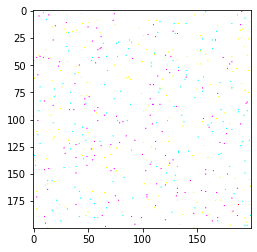

In [7]:
plt.imshow(training_data[2])

## Rescaling & center-cropping images

In [8]:
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.layers import Rescaling

training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")

cropper = CenterCrop(height=150, width=150)
scaler = Rescaling(scale=1.0 / 255)

output_data = scaler(cropper(training_data))
print("shape:", output_data.shape)
print("min:", np.min(output_data))
print("max:", np.max(output_data))

shape: (64, 150, 150, 3)
min: 0.0
max: 1.0


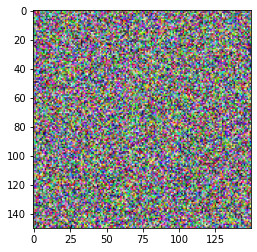

In [9]:
plt.imshow(output_data[2])

## Building models with the Keras Functional API


In [10]:
inputs = keras.Input(shape=(None, None, 3))

x = CenterCrop(height=150, width=150)(inputs)
x = Rescaling(scale=1.0 / 255)(x)

# Apply some convolution and pooling layers
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)

# Apply global average pooling to get flat feature vectors
x = layers.GlobalAveragePooling2D()(x)

# Add a dense classifier on top
num_classes = 10
outputs = layers.Dense(num_classes, activation="softmax")(x)

In [11]:
model = keras.Model(inputs=inputs, outputs=outputs)
data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")
processed_data = model(data)
print(processed_data.shape)

(64, 10)


<BarContainer object of 10 artists>

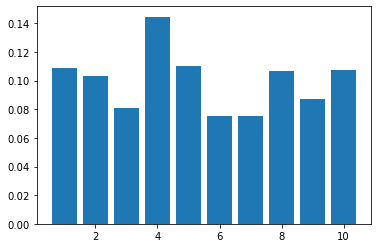

In [12]:
plt.bar(list(range(1,11)), processed_data[0])

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
center_crop_1 (CenterCrop)   (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 49, 49, 32)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_____________________________________________________________

In [14]:
# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
Total params: 118,282
Trainable params: 118,282
Non-trainab

In [15]:
print(history.history)

{'loss': [0.11327880620956421]}


In [27]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    run_eagerly=True
)
history = model.fit(dataset, epochs=1)

938/938 [==============================] - 18s 19ms/step - loss: 0.0207 - acc: 0.9930


In [17]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
history = model.fit(dataset, epochs=1, validation_data=val_dataset)

925/938 [============================>.] - ETA: 0s - loss: 0.0541 - acc: 0.9833WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ffd99b025f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
938/938 [==============================] - 4s 4ms/step - loss: 0.0546 - acc: 0.9833 - val_loss: 0.1333 - val_acc: 0.9611


## Using callbacks for checkpointing

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='path/to/my/model_{epoch}',
        save_freq='epoch')
]
model.fit(dataset, epochs=2, callbacks=callbacks)

Epoch 1/2
938/938 [==============================] - 3s 3ms/step - loss: 0.0395 - acc: 0.9879
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_n

## Monitoring training progress with TensorBoard

In [19]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(dataset, epochs=2, callbacks=callbacks)

Epoch 1/2
938/938 [==============================] - 3s 3ms/step - loss: 0.0249 - acc: 0.9919
Epoch 2/2
938/938 [==============================] - 3s 3ms/step - loss: 0.0204 - acc: 0.9934


In [26]:
%tensorboard --logdir='./logs'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/Users/rmogalasetty/anaconda3/envs/tensorflow2/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/Users/rmogalasetty/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/tensorboard/program.p

In [24]:
loss, acc = model.evaluate(val_dataset)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

157/157 [==============================] - 1s 4ms/step - loss: 0.0925 - acc: 0.9758
loss: 0.09
acc: 0.98


In [25]:
predictions = model.predict(val_dataset)
print(predictions.shape)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(10000, 10)
